<H2>Algorithmes (par David Fialaire) de travail sur le thème : 'Computer vision'</H2>
    Placer le fichier.ipynb dans un dossier contenant LES images de travail
    
    
    d'après le document : 
    
<H1>"Programming Computer Vision with Python"</H1>
                --> ici ( http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf )

    par Jan Erik Solem

<h1>Contenu : </h1>
    <h2>Chapitre 1 : Basic Image Handling and Processing </h2>
<a href="#-Fonction-0-" > Fonction 0 : Série d'imports de bibliothèques nécessaires. </a><br />
<a href="#-Fonction-1-" > Fonction 1 : Retourne une liste de chemins d'images jpeg dans un répertoire précis. </a><br />
<a href="#-Fonction-2-" > Fonction 2 : Retourne une liste d'images jpeg dans un répertoire précis. </a><br />
<a href="#-Fonction-3-" > Fonction 3 : Charge une image dans une matrice avec le module pil. </a><br />
<a href="#-Fonction-4-" > Fonction 4 : Affiche une image  déjà matricielle par matplotlib. </a><br />
<a href="#-Fonction-5-" > Fonction 5 : Permet de calculer et d'afficher une image flouettée à partir d'une matrice d'image. </a><br />
<a href="#-Fonction-6-" > Fonction 6 : Permet de Sauvegarder l'image crée/modifiée. </a><br />
<a href="#-Fonction-7-" > Fonction 7 : Affiche une image  matrice_pil avec sa légende par matplotlib à partir de son titre et du path. </a><br />
<a href="#-Fonction-8-" > Fonction 8 : Affiche une image  matrice_pil avec sa légende par matplotlib à partir de son titre et du path, <br /> et Rajoute des points et/ou des lignes colorées. </a><br />
<a href="#-Fonction-9-" > Fonction 9 : Affiche une série d'images présentes dans un répertoire  en passant par matrice_pil par matplotlib. </a><br />
<a href="#-Fonction-10-" > Fonction 10 : Top : Transforme les images en Thumbail de taille déterminée en respectant les proportions. </a><br />
<a href="#-Fonction-11-" > Fonction 11 : Top : Transforme les images en redéfinissant les proportions. </a><br />
<a href="#-Fonction-12-" > Fonction 12 : Top : Equalizer d'histogramme : affiche la photo initiale et son histogtramme, puis la photo Histoéqualisée et l'histogramme équalisé. </a><br />
<a href="#-Fonction-13-" > Fonction 13 : TipTop : Fusionne deux photos. </a><br />
<a href="#-Fonction-14-" > Fonction 14 : TipTop : Aligne de multiples photos sur des lignes. </a><br />
<a href="#-Fonction-15-" > Fonction 15 : Super : Affiche les dérivées imx et imy et magnitude d'une image matrice
        via le filtre de Sobel. </a><br />
<a href="#-Fonction-16-" > Fonction 16 : Super : Affiche les dérivées imx et imy et magnitude d'une image matrice
        via le filtre Gaussian. </a><br />
<a href="#-Fonction-17-" > Fonction 17 : Top : Permet de réduire le bruit d'une image. </a><br />
<a href="#-Fonction-18-" > Fonction 18 : Super : Permet de compter le nombre d'objets plus ou moins isolés d'une image. </a><br />
    <h2>Chapitre 2 : Local Image Descriptors </h2>
<a href="#-Fonction-19-" > Fonction 19 : Toppissime : Descripteurs locaux d'image : Harris Corner Dtector. </a><br />

 <h2> Fonction 0 </h2>

<H3>Liste d'imports de bibliothèques nécessaires à activer :</H3>
    Important : ne pas activer les autres Fonctions tant que celle ci
    n'est pas totallement validée : In [* ] --> In [1 ]

In [1]:
import os
from PIL import Image
from pylab import *
#import cv2
#import cv2 as cv
import matplotlib
from matplotlib.pyplot import *
import numpy
import math
import imageio   ## pour sauvegarder 1 image jpg à partir d'1 array (Dans Edupython, il faut préalablement
## faire : Outils --> installer nouveau module --> 2 (pip) : imageio ##
from scipy.ndimage import filters
from scipy.ndimage import measurements,morphology # load image and threshold to make sure it is binary
#########################################################
Lieu = os.getcwd()  ##  Permet d'obtenir le chemin du répertoire de travail actuel --> Placé dans Lieu

 <h2> Fonction 1 </h2>

<H3>Retourne une liste de CHEMINS d'images jpeg dans un répertoire précis. (p.14 du pdf)</H3>
    Ici, le répertoire précis est 'Lieu' défini en fonction 0, c'est à dire le répertoire 
    où se trouve le fichier.ipynb <br />
         ==> Vous placerez donc vos photos dans ce même répertoire.

In [2]:
#########################################################
""" Retourne une liste de chemin d'images jpeg dans un répertoire précis. """
def get_imlist_path(path):
    imlist=[os.path.join(Lieu,f) for f in os.listdir(Lieu) if f.endswith(".jpg")]
    return imlist
#########################################################
imlist=get_imlist_path(Lieu)
print(imlist)

['E:\\EduPython\\Jupyter_script\\Computer_Vision\\ER5NB.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\ER5NB_returned.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\ER2NB.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\ER5NB_Return_fuz.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\Gaussian.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\NC2.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\portraitpixelise.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\Rof vs Gaussian.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\taches.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\aMK2.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\ER1NB.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\FLOU.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\q.jpg', 'E:\\EduPython\\Jupyter_script\\Computer_Vision\\CountObject.jpg']


 <h2> Fonction 2 </h2>

<H3>Retourne une liste d'images jpeg dans un répertoire précis</H3>

In [3]:
#############################################################
""" Retourne une liste d'images jpeg dans un répertoire précis """
def get_imlist(path):
    imlist=[os.path.join(f) for f in os.listdir(Lieu) if f.endswith(".jpg")]
    return imlist
#############################################################
imlist=get_imlist(Lieu)
print(imlist)

['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg']


 <h2> Fonction 3 </h2>

<H3>Charge une image dans une matrice avec le module pil (p.13 du pdf) </H3>
    Ici, on propose à l'utlisateur de choisir l'image à charger,
        donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !)

In [4]:
#########################################################
""" Charge une image dans une matrice avec le module pil """
def charg_image_pil(path,titre_image):
    os.chdir(path)
    pil_im = Image.open(titre_image)
    return pil_im
#########################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ",imlist)
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
pil_im=charg_image_pil(Lieu,titre)
print("--> Image chargée dans la variable pil-im.")

Voici la liste des images présentes dans le répertoire actuel :  ['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg']
Donnez le N° de l'image que vous souhaitez charger de 0 à  13
0
--> Image chargée dans la variable pil-im.


 <h2> Fonction 4 </h2>

<H3>Affiche une image  déjà matricielle par matplotlib (p.16 du pdf) </H3>
    Ici, on propose à l'utlisateur de choisir l'image à charger, <br />
        -->donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !) <br />
    Puis on charge l'image choisie dans une matrice, <br />
        -->donc on passe par la fonction charg_image_pil (Fonction 3 à activer si ce n'est déjà fait !)

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  13
0


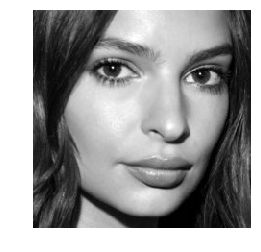

In [5]:
##########################################################
""" affiche une image  déjà matricielle 
         par matplotlib """
def affich_image_array_pil(Matrice_Name):
    image = numpy.array(Matrice_Name)
    gray()
    # plot the image
    imshow(image)
    axis('off')
##########################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ")
print(imlist)
print()
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
Matrice_Name=charg_image_pil(Lieu,titre)
affich_image_array_pil(Matrice_Name)
show()


 <h2> Fonction 5 </h2>

<H3>Permet de calculer et d'afficher une image flouettée à partir d'une matrice d'image (p.31 du pdf)</H3>
Ici, on propose à l'utlisateur de choisir l'image à charger, <br />
        -->donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !) <br />
    Puis on charge l'image choisie dans une matrice, <br />
        -->donc on passe par la fonction charg_image_pil (Fonction 3 à activer si ce n'est déjà fait !) <br />
            Ensuite on floutte l'image dans la matrice (Fonction 5) <br />
                Enfin, on affiche l'image (Fonction 4 à activer si ce n'est déjà fait !) <br /> <br />
                      ==> NE PAS OUBLIER DE FAIRE q POUR QUITTER.

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  13
0


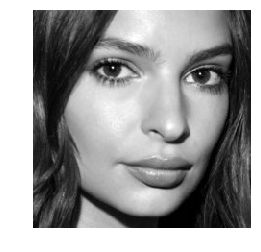

Donnez la valeur du sigma souhaité pour le flou : 3


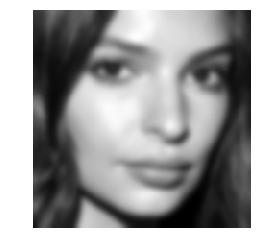

Donnez une autre valeur de sigma... ou q pour quitter : q


In [6]:
##########################################################
#####     Permet de calculer et d'afficher une image flouettée
######     à partir d'une matrice d'image
##########################################################
def affich_flouttage(matrice,sigma):
    im2 = filters.gaussian_filter(matrice,sigma)
#    gray()
    affich_image_array_pil(im2)
    return im2
###################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ")
print(imlist)
print()
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
Matrice_Name=charg_image_pil(Lieu,titre)
affich_image_array_pil(Matrice_Name)
show()
boucl=0

sigma=input("Donnez la valeur du sigma souhaité pour le flou : ")
sigma=int(sigma)
im2=affich_flouttage(Matrice_Name,sigma)
show()
while boucl==0:
    sigma=input("Donnez une autre valeur de sigma... ou q pour quitter : ")
    if sigma=="q":
        boucl=1
    else:
        sigma=int(sigma)
        affich_flouttage(Matrice_Name,sigma)
        show()

 <h2> Fonction 6 </h2>

<H3>Permet de Sauvegarder l'image crée/modifiée (Ex : image flouttée) </H3>
Ici, on propose à l'utlisateur de choisir l'image à charger, <br />
        -->donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !) <br />
    Puis on charge l'image choisie dans une matrice, <br />
        -->donc on passe par la fonction charg_image_pil (Fonction 3 à activer si ce n'est déjà fait !) <br />
            Ensuite on floutte l'image dans la matrice (Fonction 5 à activer si ce n'est déjà fait !) <br />
                Puis, on affiche l'image (Fonction 4 à activer si ce n'est déjà fait !) <br />
                    et pour finir, on enregistre l'image dans le répertoire actif (Fonction 6)

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  13
0


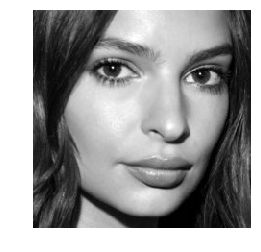

Donnez la valeur du sigma souhaité pour le flou : 3


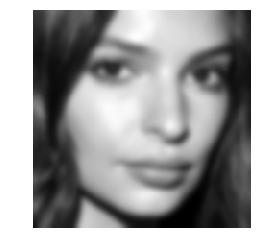

Quel nom souhaité vous donnez à cette image flouttée ? : floux

L'image est enregistrée


In [7]:
###################################################
###    Sauvegarder l'image crée/modifiée  #########
###################################################
def sauvegard_image(path,name,matric):
    os.chdir(path)
#    scipy.misc.imageio.imwrite(name_matric,matric)
    #imageio.imwrite(name, matric)
    name_format=name+".jpg"
    imageio.imwrite(name_format, matric[:, :])
#####################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ")
print(imlist)
print()
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
Matrice_Name=charg_image_pil(Lieu,titre)
affich_image_array_pil(Matrice_Name)
show()

sigma=input("Donnez la valeur du sigma souhaité pour le flou : ")
sigma=int(sigma)
im2=affich_flouttage(Matrice_Name,sigma)
show()
Nam_Flout=input("Quel nom souhaité vous donnez à cette image flouttée ? : ")
sauvegard_image(Lieu,Nam_Flout,im2)
print()
print("L'image est enregistrée")


 <h2> Fonction 7 </h2>

<H3>Affiche une image  matrice_pil avec sa légende par matplotlib à partir de son titre et du path </H3>
Ici, dans l'envois de la fonction, on donne le chemin, le titre et la demande ou non de légende de l'image à afficher, <br />
        -->donc on passe par la fonction charg_image_pil (imports et Fonctions 2 et 3 à activer si ce n'est déjà fait !) <br />

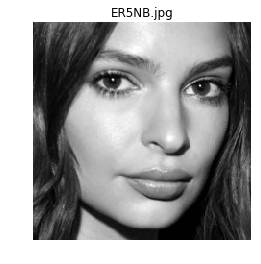

In [8]:
#####################################################
""" affiche une image  matrice_pil par matplotlib à partir 
         de son titre et du path"""
def affich_image_array_pil_titre(path,titre,legende):
    os.chdir(path)
    pil_im=charg_image_pil(path,titre)
    image = numpy.array(pil_im)
    imshow(image)
    axis('off')
    if legende=="oui":
        title(titre)
    else:
        z=0
    show()
    #return image
##########################################################
affich_image_array_pil_titre(Lieu,titre,"oui")

 <h2> Fonction 8 </h2>

<H3>Affiche une image  matrice_pil avec sa légende par matplotlib à partir de son titre et du path, <br /> et Rajoute des points et/ou des lignes colorées (p.16 du pdf) </H3>
Ici, dans l'envois de la fonction, on donne le chemin, le titre et la demande ou non de légende de l'image à afficher, 
Ainsi que les coordonnées d'origine et d'arrivée d'une ligne formée par un symbol précisé. <br />
        -->donc on passe par la fonction charg_image_pil (imports et Fonctions 2 et 3 à activer si ce n'est déjà fait !) <br />

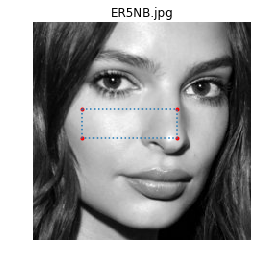

In [9]:
##########################################################
""" affiche une image  matrice_pil par matplotlib à partir 
         de son titre et du path et des points-lignes"""
##################################################
""" ’b’ blue
’g’ green
’r’ red
’c’ cyan
’m’ magenta
’y’ yellow
’k’ black
’w’ white"""
""" ’.’ point
’o’ circle
’s’ square
’*’ star
’+’ plus  """
def plot_marqueur(x,y,mark):
    plot(x,y,mark)
##################################################
""" ’-’ solid
’- -’ dashed
’:’ dotted  """
def plot_ligne(xl,yl):
    plot(xl[:],yl[:],":")
####################################################
def affich_image_array_pil_titre_ligne(path,titre,legende,x,y,mark,xl,yl):
    os.chdir(path)
    pil_im=charg_image_pil(path,titre)
    image = numpy.array(pil_im)
    imshow(image)
    axis("off")
    if legende=="oui":
        title(titre)
    else:
        z=0
    plot_marqueur(x,y,mark)
    plot_ligne(xl,yl)
    show()
##########################################################
# avec un rectangle au centre
x = [50,50,150,150]
y = [90,120,90,120]
xl = [50,50,150,150,50]
yl = [90,120,120,90,90]
mark="r."
affich_image_array_pil_titre_ligne(Lieu,titre,"oui",x,y,mark,xl,yl)

 <h2> Fonction 9 </h2>

<H3>Affiche une série d'images présentes dans un répertoire  en passant par matrice_pil par matplotlib </H3>
        -->donc on passe par la fonction charg_image_pil (imports et Fonctions 2 et 3 à activer si ce n'est déjà fait !) 

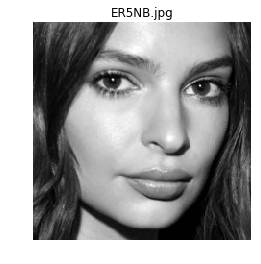

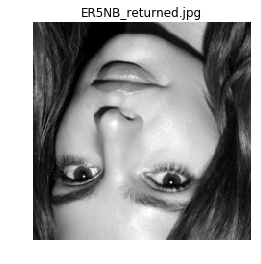

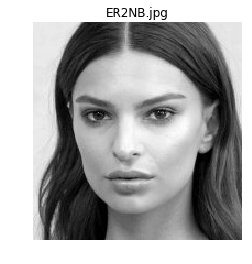

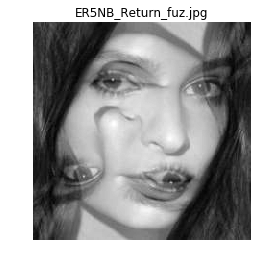

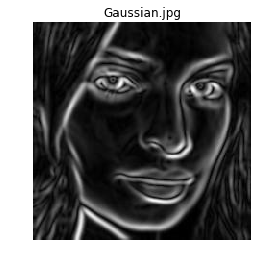

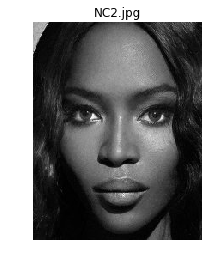

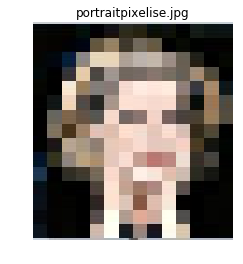

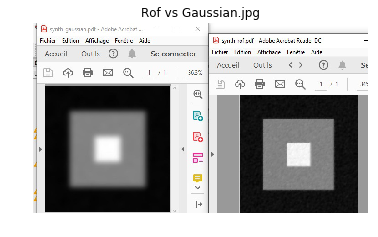

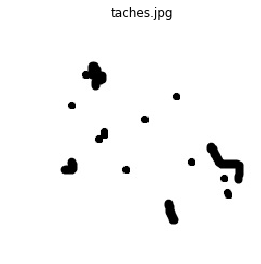

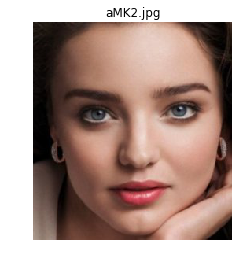

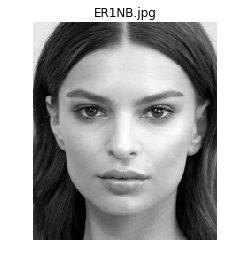

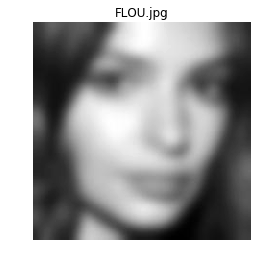

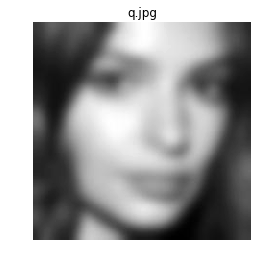

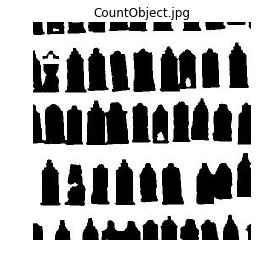

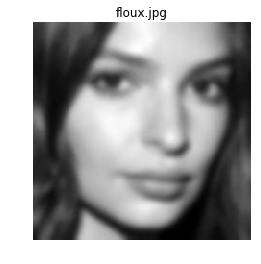

In [10]:
##########################################################
""" affiche une série d'images présentes dans un répertoire
   en passant par matrice_pil
         par matplotlib"""
def affich_serie_image_matplot(path):
    os.chdir(path)
    imlist=get_imlist(path)
    long_imlist=len(imlist)
    for i in range(long_imlist):
        titre=imlist[i]
        Matrice_Name=charg_image_pil(Lieu,titre)
        affich_image_array_pil(Matrice_Name)
        title(titre)
        axis("off")
        show()
##################################################
affich_serie_image_matplot(Lieu)

 <h2> Fonction 10 </h2>

<H3>Top : Transforme les images en Thumbail de taille déterminée en respectant les proportions (p.15 du pdf) </H3>
        -->donc on passe par les fonctions charg_image_pil et affich_image_array_pil (imports et Fonctions 2, 3 et 4 à activer si ce n'est déjà fait !) 

Choisissez un nombre maximum de pixel pour les côtés : 60

--> Le plus grand côté aura une taille de  60 , et les proportions seront gardées.


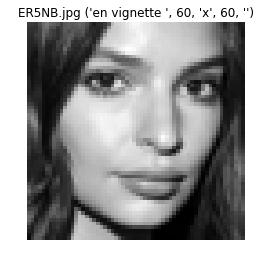

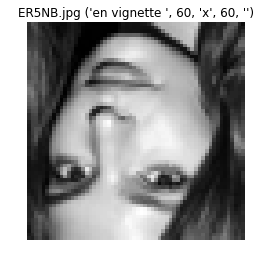

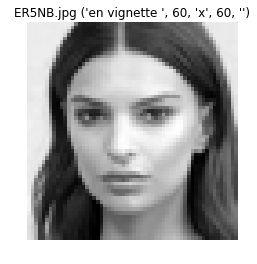

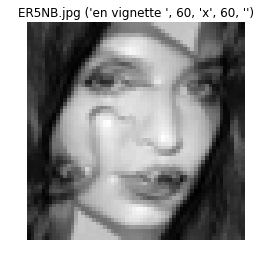

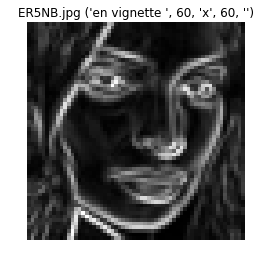

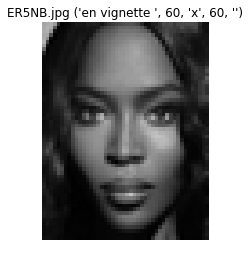

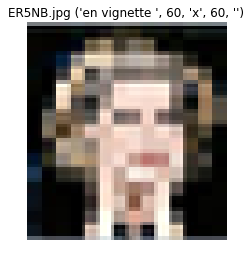

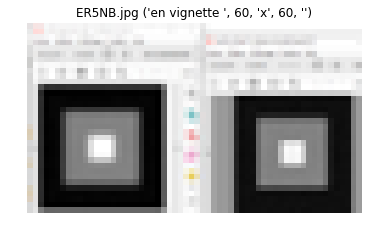

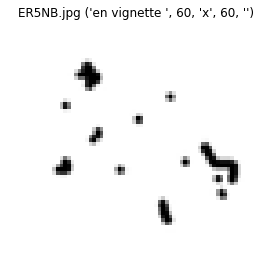

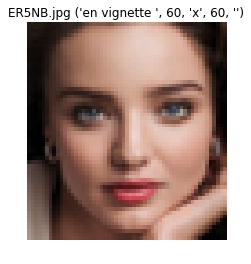

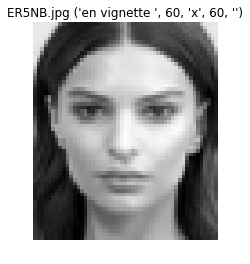

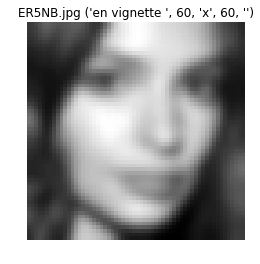

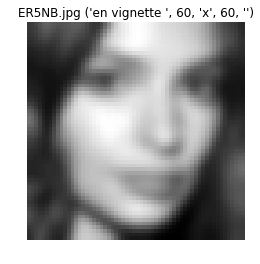

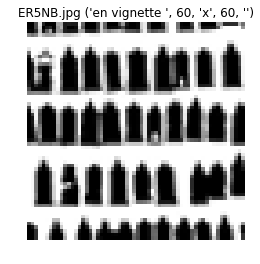

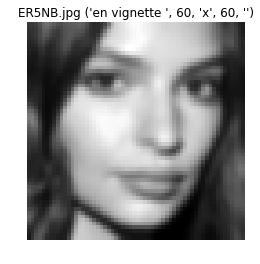

In [11]:
##################################################
#    Top : affiche les images en Thumbail
##################################################
def affich_thumbail(path,titre, taille,legende):
    os.chdir(path)
    imlist=get_imlist(path)
    long_imlist=len(imlist)
    for i in range(long_imlist):
        pil_im= charg_image_pil(path,imlist[i])
        pil_im.thumbnail((taille,taille))
        affich_image_array_pil(Matrice_Name=pil_im)
        if legende=="oui":
            thumbo="en vignette ",taille,"x",taille,""
            thumbo=str(thumbo)
            titr_thumb=titre+" "+thumbo
            title(titr_thumb)
        else:
            z=0
        show()
####################################################
taille=int(input("Choisissez un nombre maximum de pixel pour les côtés : "))
print()
print("--> Le plus grand côté aura une taille de ",taille,", et les proportions seront gardées.")
affich_thumbail(Lieu,titre, taille,"oui")

 <h2> Fonction 11 </h2>

<H3>Top : Transforme les images en redéfinissant les proportions (p.24 du pdf) </H3>
        -->donc on passe par les fonctions charg_image_pil et affich_image_array_pil (imports et Fonctions 2, 3 et 4 à activer si ce n'est déjà fait !) 

Donnez la largeur de photo souhaitée : 75
Donnez la hauteur de photo souhaitée : 30


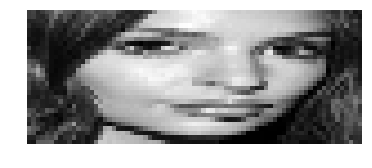

In [13]:
####################################################
""" Réduit une image array utilisant Pil """
def imresize(im,sz):
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))
#############################################################
im=charg_image_pil(Lieu,titre)
x=int(input("Donnez la largeur de photo souhaitée : "))
y=int(input("Donnez la hauteur de photo souhaitée : "))
size=(x,y)
imo=imresize(im,size)
affich_image_array_pil(imo)
show()

 <h2> Fonction 12 </h2>

<H3>Top : Equalizer d'histogramme : affiche la photo initiale et son histogtramme,
puis la photo Histoéqualisée et l'histogramme équalisé (p.25 du pdf) </H3>
        -->donc on passe par la fonction affich_image_array_pil_titre et charg_image_pil (imports et Fonctions 2, 3 et 7 à activer si ce n'est déjà fait !) 

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg', 'floux.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  14
0


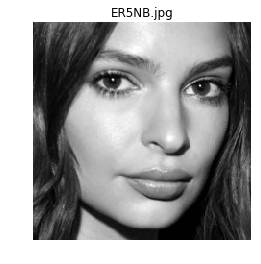

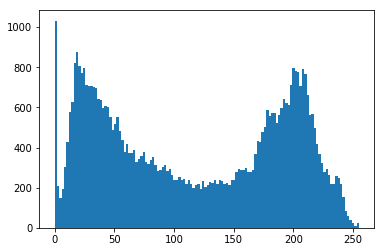

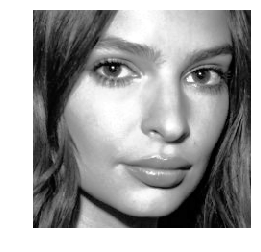

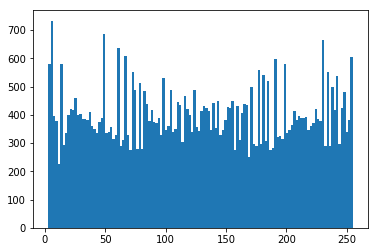

In [14]:
#############################################################
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf
#############################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ")
print(imlist)
print()
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
affich_image_array_pil_titre(Lieu,titre,"oui")
im=charg_image_pil(Lieu,titre)
imu = numpy.array(im.convert("L"))
figure()
hist(imu.flatten(),128)
show()
im=charg_image_pil(Lieu,titre)
imu = numpy.array(im.convert("L"))
imo,cdf=histeq(imu,nbr_bins=256)
affich_image_array_pil(imo)
figure()
hist(imo.flatten(),128)
show()

 <h2> Fonction 13 </h2>

<H3>TipTop : Fusionne deux photos (p.26 du pdf) </H3>
        -->donc on passe par la fonction get_imlist_path et affich_image_array_pil (imports et Fonctions 1 et 4 à activer si ce n'est déjà fait !)
<H3> CONSEIL : </H3> Ne laisser (momentannément) que 2 photos dans le répertoire de MEME TAILLE

E:\EduPython\Jupyter_script\Computer_Vision\ER2NB.jpg ...skipped
E:\EduPython\Jupyter_script\Computer_Vision\NC2.jpg ...skipped
E:\EduPython\Jupyter_script\Computer_Vision\portraitpixelise.jpg ...skipped
E:\EduPython\Jupyter_script\Computer_Vision\Rof vs Gaussian.jpg ...skipped
E:\EduPython\Jupyter_script\Computer_Vision\taches.jpg ...skipped
E:\EduPython\Jupyter_script\Computer_Vision\aMK2.jpg ...skipped
E:\EduPython\Jupyter_script\Computer_Vision\ER1NB.jpg ...skipped
E:\EduPython\Jupyter_script\Computer_Vision\CountObject.jpg ...skipped


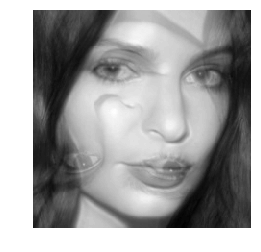

In [15]:
#############################################################
""" Compute the average of a list of images. """
def compute_average(imlist):
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), "f")
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print (imname , "...skipped")
    averageim /= len(imlist)
    # return average as uint8
    return array(averageim, "uint8")
###################################################################
imlist=get_imlist_path(Lieu)
im=compute_average(imlist)
affich_image_array_pil(im)
show()

 <h2> Fonction 14 </h2>

<H3>TipTop : Aligne de multiples photos sur des lignes (p.29 du pdf) </H3>
        -->donc on passe par la fonction get_imlist_path et affich_image_array_pil (imports et Fonctions 1 et 4 à activer si ce n'est déjà fait !)

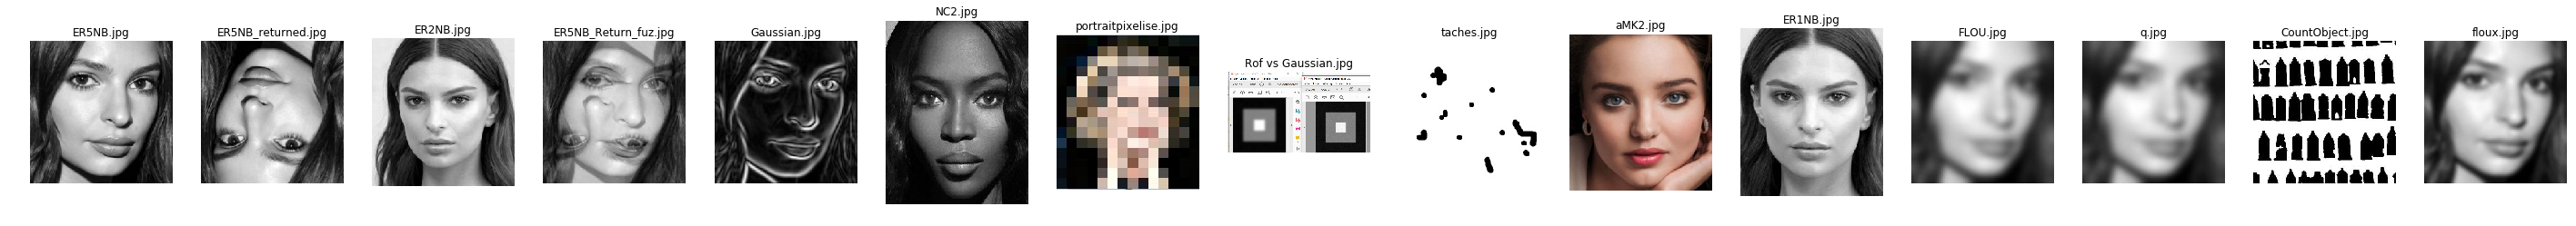

In [16]:
###################################################################
#""" affiche de multiples photos espacées sur une même ligne
#provenant d'un unique répertoire """
def Align_affich_photo_repertoir(path):
    imlist=get_imlist(path)
    long_imlist=len(imlist)
    figure(figsize=(50,long_imlist))
    gray()
    for i in range(long_imlist):
        titre=imlist[i]
        subplot(1,long_imlist,i+1)
        title(titre)
        axis('off')
        matrice=charg_image_pil(path,titre)
        image = numpy.array(matrice)
        imshow(image)
###################################################################
Align_affich_photo_repertoir(Lieu)
show()

 <h2> Fonction 15 </h2>

<H3>Affiche les dérivées imx et imy et magnitude d'une image matrice
        via le filtre de Sobel (p.32-34  du pdf) </H3>
        Ici, on propose à l'utlisateur de choisir l'image à charger, <br />
        -->donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !) <br />
    Puis on charge l'image choisie dans une matrice, <br />
        -->donc on passe par la fonction charg_image_pil (Fonction 3 à activer si ce n'est déjà fait !) <br />
            Ensuite on crée les dérivées imx et imx, ainsi que la magnitude selon le filtre de Sobel (Fonctions 15)

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg', 'floux.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  14
0


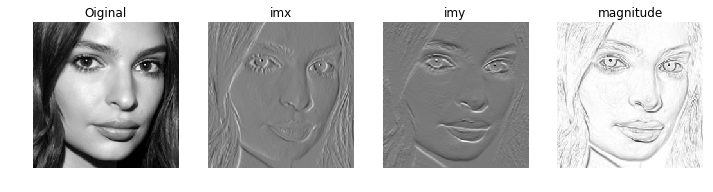

In [17]:
########################################################################"
""" Affiche les dérivées imx et imy et magnitude d'une image matrice
        via le filtre de Sobel"""
########################################################################"
def deriv_magnitude_Sobel(image):
    imx = zeros(image.size)
    filters.sobel(image,1,imx)
    imy = zeros(image.size)
    filters.sobel(image,0,imy)
    magnitude = sqrt(imx**2+imy**2)
    figure(figsize=(12,4))
    gray()
    subplot(1,4,1)
    title('Oiginal')
    axis('off')
    imshow(image)
    subplot(1,4,2)
    title('imx')
    axis('off')
    imshow(imx)
    subplot(1,4,3)
    title('imy')
    axis('off')
    imshow(imy)
    subplot(1,4,4)
    title('magnitude')
    axis('off')
    imshow(magnitude, cmap="gray_r")
    ######################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ")
print(imlist)
print()
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
im=charg_image_pil(Lieu,titre)
deriv_magnitude_Sobel(im)
show()

 <h2> Fonction 16 </h2>

<H3>Affiche les dérivées imx et imy et magnitude d'une image matrice
        via le filtre Gaussian (p.34  du pdf) </H3>
        Ici, on propose à l'utlisateur de choisir l'image à charger, <br />
        -->donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !) <br />
    Puis on charge l'image choisie dans une matrice, <br />
        -->donc on passe par la fonction charg_image_pil (Fonction 3 à activer si ce n'est déjà fait !) <br />
            Ensuite on crée les dérivées imx et imx, ainsi que la magnitude selon le filtre Gaussian (Fonctions 16)

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg', 'floux.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  14
0


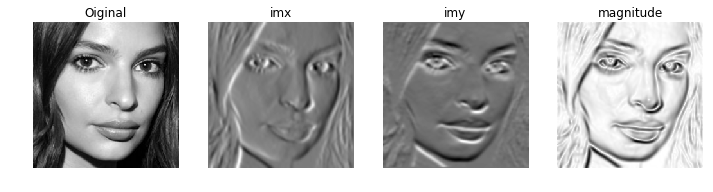

In [18]:
########################################################################"
""" Affiche les dérivées imx et imy et magnitude d'une image matrice
        via le filtre GAUSSIAN """
########################################################################"
def deriv_magnitude_Gaussian(image):
    sigma=2 #standard deviation
    imx = zeros(image.size)
    filters.gaussian_filter(image, (sigma,sigma), (0,1), imx)
    imy = zeros(image.size)
    filters.gaussian_filter(image, (sigma,sigma), (1,0), imy)
    magnitude = sqrt(imx**2+imy**2)
    figure(figsize=(12,4))
    gray()
    subplot(1,4,1)
    title('Oiginal')
    axis('off')
    imshow(image)
    subplot(1,4,2)
    title('imx')
    axis('off')
    imshow(imx)
    subplot(1,4,3)
    title('imy')
    axis('off')
    imshow(imy)
    subplot(1,4,4)
    title('magnitude')
    axis('off')
    imshow(magnitude, cmap="gray_r")
    return magnitude
#################################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ")
print(imlist)
print()
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
im=charg_image_pil(Lieu,titre)
deriv_magnitude_Gaussian(im)
show()

 <h2> Fonction 17 </h2>

<H3>Permet de réduire le bruit d'une image (p.39-41  du pdf) </H3>
        Ici, on propose à l'utlisateur de choisir l'image à charger, <br />
        -->donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !) <br />
    Puis on applique la fonction de réduction de bruit (Fonctions 17). <br /><br />
               ==> PS : Vous pouvez testez de modifier le tv_weight entre 1 à 100 par ex.

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg', 'floux.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  14
5


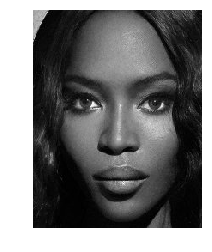

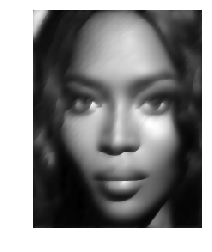

In [19]:
########################################################################"
def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):
    """ An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented by Chambolle (2005).
    Input: noisy input image (grayscale), initial guess for U, weight of
    the TV-regularizing term, steplength, tolerance for stop criterion.
    Output: denoised and detextured image, texture residual. """
    m,n = im.shape #size of noisy image
    # initialize
    U = U_init
    Px = im #x-component to the dual field
    Py = im #y-component of the dual field
    error = 1
    while (error > tolerance):
        Uold = U
        # gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U’s gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U’s gradient
        # update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)
        # update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable
        # update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);
    return U,im-U # denoised image and texture residual
############################################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
print("Voici la liste des images présentes dans le répertoire actuel : ")
print(imlist)
print()
print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1)
Num=input()
titre=imlist[int(Num)]
im = array(Image.open(titre).convert("L"))
U,T = denoise(im,im)
affich_image_array_pil(im)
show()
affich_image_array_pil(U)
show()

 <h2> Fonction 18 </h2>

<H3>Permet de compter le nombre d'objets plus ou moins isolés d'une image (p.35-37  du pdf) </H3> <br />
     Attention, il vous faut un image présentant des objets plus ou moins isolés ! <br /> <br />
     Ici, on propose à l'utlisateur de choisir l'image à charger, <br />
        -->donc on passe par la fonction get_imlist (Fonction 2 à activer si ce n'est déjà fait !) <br />
    Puis on charge l'image choisie dans une matrice, <br />
        -->donc on passe par la fonction charg_image_pil (Fonction 3 à activer si ce n'est déjà fait !) <br />
            Ensuite on floutte l'image dans la matrice (Fonction 5 à activer si ce n'est déjà fait !) <br />
                Puis, on affiche l'image (Fonction 4 à activer si ce n'est déjà fait !) <br /> <br />
        Dès lors, on applique la fonction de dénombrement d'objets (Fonctions 18). <br /><br />

Voici la liste des images présentes dans le répertoire actuel : 
['ER5NB.jpg', 'ER5NB_returned.jpg', 'ER2NB.jpg', 'ER5NB_Return_fuz.jpg', 'Gaussian.jpg', 'NC2.jpg', 'portraitpixelise.jpg', 'Rof vs Gaussian.jpg', 'taches.jpg', 'aMK2.jpg', 'ER1NB.jpg', 'FLOU.jpg', 'q.jpg', 'CountObject.jpg', 'floux.jpg']

Donnez le N° de l'image que vous souhaitez charger de 0 à  14  ou q pour Quitter : 
13


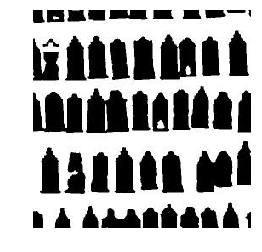

Nombre d'objets visualisés dans cette image :  45

Souhaitez-vous faire un nouvel essai (o - n) ? : n


In [20]:
def count_object(titre_image):
    im = array(Image.open(titre_image).convert("L"))
    im = 1*(im<128)
    labels, nbr_objects = measurements.label(im)
    print ("Nombre d'objets visualisés dans cette image : ", nbr_objects)
########################################################################
imlist=get_imlist(Lieu)
Nombre=len(imlist)
boucl=0
while boucl==0:
    print("Voici la liste des images présentes dans le répertoire actuel : ")
    print(imlist)
    print()
    print("Donnez le N° de l'image que vous souhaitez charger de 0 à ",Nombre-1," ou q pour Quitter : ")
    Num=input()
    if Num=="q":
        boucl=1
    else:
        titre=imlist[int(Num)]
        Matrice_Name=charg_image_pil(Lieu,titre)
        affich_image_array_pil(Matrice_Name)
        show()
        count_object(titre)
        print()
        repp=input("Souhaitez-vous faire un nouvel essai (o - n) ? : ")
        if repp=="o":
            print()
        else:
            boucl=1

 <h2> Fonction 19 </h2>

<H3>Produit des Descripteurs locaux d'images pour comparer des photos : Harris Corner Detector (p.45-52  du pdf) </H3> <br />
     Attention, il faudra choisir 2 images proches mais pas identiques et renseigner leur titre lignes 140-141 ! <br /> <br />
    Pas besoin d'activer les cellules précédentes : cette fonction est complète : <br /> <br />
        L'algorithme recherche d'abord les descripteurs locaus dans chaque image et les présente sur l'image ; puis, il les compare en mirroir <br />
        de manière à éliminer les plus mauvais d'entre eux. <br />
            Enfin, les descripteurs retenus sur chaque photo sont reliés par des lignes.

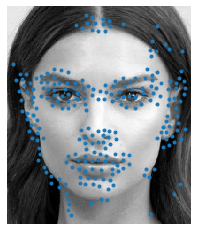

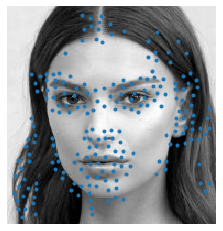

starting matching
[ -1  -1  54 169  -1  -1  -1  96  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  48  -1  27  -1  60  -1  -1  93  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1 167  -1  -1  75 175 148  92 135  32 110  87  -1  -1 112 163
  -1  -1  -1  -1  -1  76  -1  72  -1 156  -1  -1  -1  56  42  -1  -1  -1
  -1  -1  -1  64  -1  -1  31 144  -1  -1  -1  -1  80  -1 155  -1  -1  -1
  -1  -1 131  -1  -1  29  -1 111  -1  -1  84  81  -1  49  -1 115 106  -1
  -1  -1   1  94  -1  -1  -1  -1  23  -1  -1  70  -1  -1  -1  51  -1  61
  95  13  -1  -1  -1 178  -1  36  -1  -1 172  -1  -1  -1  -1 104  -1  -1
  -1  -1 138  -1  -1  -1  -1  -1  -1  -1  -1  65  -1  62 165  -1  22 166
  -1  86 153  21  74  -1  -1  -1 147  -1  -1  -1  -1 125  -1  -1  -1  -1
  -1  -1  -1  -1 197  97  -1  -1 194  -1  85  -1  -1 120  -1  -1 191  -1
  -1  -1  -1  -1  40  -1  -1  -1 105  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1 200  -1  -1  -1  -1  -1  -1 208  -1  -1  -1  -1  -1 206 133  -1 193
 209  -1  -1  -1]
compute_harris_

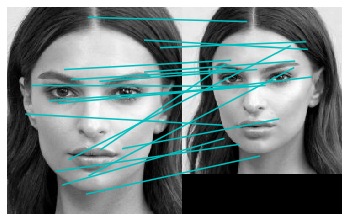

In [19]:
import os
from PIL import Image
from pylab import *
#import cv2
#import cv2 as cv
import matplotlib
from matplotlib.pyplot import *
import numpy
import math
import imageio   ## pour sauvegarder 1 image jpg à partir d'1 array
from scipy.ndimage import filters
from scipy.ndimage import measurements,morphology # load image and threshold to make sure it is binary
from scipy.ndimage import filters
def compute_harris_response(im,sigma=3):
    """ Compute the Harris corner detector response function
    for each pixel in a graylevel image. """
    # derivatives
    imx = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
    imy = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), imy)
    # compute components of the Harris matrix
    Wxx = filters.gaussian_filter(imx*imx,sigma)
    Wxy = filters.gaussian_filter(imx*imy,sigma)
    Wyy = filters.gaussian_filter(imy*imy,sigma)
    # determinant and trace
    Wdet = Wxx*Wyy - Wxy**2
    Wtr = Wxx + Wyy
    return Wdet / Wtr
def get_harris_points(harrisim,min_dist=10,threshold=0.02):
    """ Return corners from a Harris response image
    min_dist is the minimum number of pixels separating
    corners and image boundary. """
    # find top corner candidates above a threshold
    corner_threshold = harrisim.max() * threshold
    harrisim_t = (harrisim > corner_threshold) * 1
    # get coordinates of candidates
    coords = array(harrisim_t.nonzero()).T
    # ...and their values
    candidate_values = [harrisim[c[0],c[1]] for c in coords]
    # sort candidates
    index = argsort(candidate_values)
    # store allowed point locations in array
    allowed_locations = zeros(harrisim.shape)
    allowed_locations[min_dist:-min_dist,min_dist:-min_dist] = 1
    # select the best points taking min_distance into account
    filtered_coords = []
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]] == 1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-min_dist):(coords[i,0]+min_dist),(coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return filtered_coords
def plot_harris_points(image,filtered_coords):
    """ Plots corners found in image. """
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in filtered_coords],[p[0] for p in filtered_coords],".")
    axis("off")
    show()
###########################################################################################
# Fonctions supplémentaires de comparaison des harris corners detectors sur 2 images
###########################################################################################

def get_descriptors(image,filtered_coords,wid=5):
    """ For each point return pixel values around the point
    using a neighbourhood of width 2*wid+1. (Assume points are
    extracted with min_distance > wid). """
    desc = []
    for coords in filtered_coords:
        patch = image[coords[0]-wid:coords[0]+wid+1,
        coords[1]-wid:coords[1]+wid+1].flatten()
        desc.append(patch)
    return desc

def match(desc1,desc2,threshold=0.5):
    """ For each corner point descriptor in the first image,
    select its match to second image using
    normalized cross correlation. """
    n = len(desc1[0])
    # pair-wise distances
    d = -ones((len(desc1),len(desc2)))
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            d1 = (desc1[i] - mean(desc1[i])) / std(desc1[i])
            d2 = (desc2[j] - mean(desc2[j])) / std(desc2[j])
            ncc_value = sum(d1 * d2) / (n-1)
            if ncc_value > threshold:
                d[i,j] = ncc_value
    ndx = argsort(-d)
    matchscores = ndx[:,0]
    return matchscores

def match_twosided(desc1,desc2,threshold=0.5):
    """ Two-sided symmetric version of match(). """
    matches_12 = match(desc1,desc2,threshold)
    matches_21 = match(desc2,desc1,threshold)
    ndx_12 = where(matches_12 >= 0)[0]
    # remove matches that are not symmetric
    for n in ndx_12:
        if matches_21[matches_12[n]] != n:
            matches_12[n] = -1
    return matches_12
###########################################################################################
def appendimages(im1,im2):
    """ Return a new image that appends the two images side-by-side. """
    # select the image with the fewest rows and fill in enough empty rows
    rows1 = im1.shape[0]
    rows2 = im2.shape[0]
    if rows1 < rows2:
        im1 = concatenate((im1,zeros((rows2-rows1,im1.shape[1]))),axis=0)
    elif rows1 > rows2:
        im2 = concatenate((im2,zeros((rows1-rows2,im2.shape[1]))),axis=0)
    # if none of these cases they are equal, no filling needed.
    return concatenate((im1,im2), axis=1)

def plot_matches(im1,im2,locs1,locs2,matchscores,show_below=False):
    """ Show a figure with lines joining the accepted matches
    input: im1,im2 (images as arrays), locs1,locs2 (feature locations),
    matchscores (as output from ’match()’),
    show_below (if images should be shown below matches). """
    im3 = appendimages(im1,im2)
    if show_below:
        im3 = vstack((im3,im3))
    imshow(im3)
    cols1 = im1.shape[1]
    for i,m in enumerate(matchscores):
        if m>0:
            plot([locs1[i][1],locs2[m][1]+cols1],[locs1[i][0],locs2[m][0]],"c")
    axis("off")
############################################################################################"
# Comparaison des detecteurs harris sur 2 images
wid = 5
im1 = array(Image.open("ER1NB.jpg").convert("L"))
im2 = array(Image.open("ER2NB.jpg").convert("L"))
harrisim = compute_harris_response(im1,2)#5
filtered_coords1 = get_harris_points(harrisim,wid+1)

plot_harris_points(im1, filtered_coords1)

d1 = get_descriptors(im1,filtered_coords1,wid)
harrisim = compute_harris_response(im2,2)#5
filtered_coords2 = get_harris_points(harrisim,wid+1)

plot_harris_points(im2, filtered_coords2)

d2 = get_descriptors(im2,filtered_coords2,wid)
print ("starting matching")
matches = match_twosided(d1,d2)
#figure()
#gray()
print(matches)
print("compute_harris_response(im2,2)")
print("matches[:60]")
plot_matches(im1,im2,filtered_coords1,filtered_coords2,matches[:60])#100
show()